In [ ]:
pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1]:
import pandas as pd
import numpy as np

import seaborn as sns

In [2]:
df = pd.read_csv('/content/sample_data/fake_reg.csv')

In [3]:
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


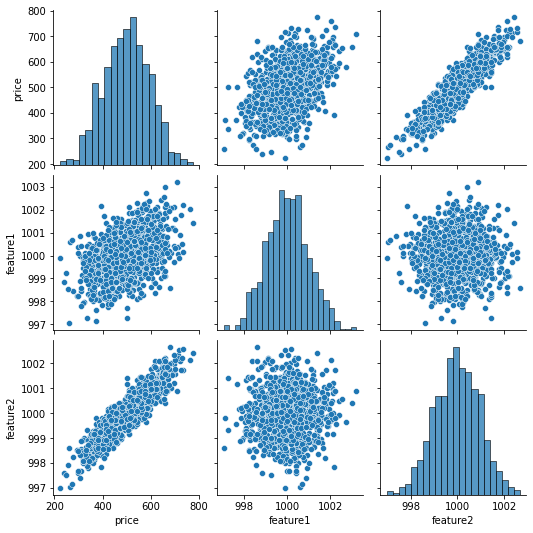

In [4]:
sns.pairplot(df)

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X = df[['feature1','feature2']].values

In [7]:
y = df['price'].values

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [10]:
X_train.shape

(700, 2)

In [11]:
X_test.shape

(300, 2)

In [12]:
from sklearn.preprocessing import MinMaxScaler

In [13]:
help(MinMaxScaler)

Help on class MinMaxScaler in module sklearn.preprocessing._data:

class MinMaxScaler(sklearn.base._OneToOneFeatureMixin, sklearn.base.TransformerMixin, sklearn.base.BaseEstimator)
 |  MinMaxScaler(feature_range=(0, 1), *, copy=True, clip=False)
 |  
 |  Transform features by scaling each feature to a given range.
 |  
 |  This estimator scales and translates each feature individually such
 |  that it is in the given range on the training set, e.g. between
 |  zero and one.
 |  
 |  The transformation is given by::
 |  
 |      X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
 |      X_scaled = X_std * (max - min) + min
 |  
 |  where min, max = feature_range.
 |  
 |  This transformation is often used as an alternative to zero mean,
 |  unit variance scaling.
 |  
 |  Read more in the :ref:`User Guide <preprocessing_scaler>`.
 |  
 |  Parameters
 |  ----------
 |  feature_range : tuple (min, max), default=(0, 1)
 |      Desired range of transformed data.
 |  
 |  copy : b

In [14]:
scaler = MinMaxScaler()

In [15]:
scaler.fit(X_train)

MinMaxScaler()

In [16]:
X_train = scaler.transform(X_train)

In [17]:
X_test = scaler.transform(X_test)

In [18]:
X_train.max()

1.0

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [20]:
#help(Sequential)

In [21]:
model = Sequential()

model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))

model.add(Dense(1))

model.compile(optimizer='rmsprop',loss='mse')

In [22]:
model.fit(x=X_train,y=y_train,epochs=250)

Epoch 1/250
22/22 [==============================] - 1s 2ms/step - loss: 256601.4844
Epoch 2/250
22/22 [==============================] - 0s 2ms/step - loss: 256436.5312
Epoch 3/250
22/22 [==============================] - 0s 2ms/step - loss: 256254.9531
Epoch 4/250
22/22 [==============================] - 0s 2ms/step - loss: 256039.3438
Epoch 5/250
22/22 [==============================] - 0s 2ms/step - loss: 255785.2969
Epoch 6/250
22/22 [==============================] - 0s 2ms/step - loss: 255485.8438
Epoch 7/250
22/22 [==============================] - 0s 2ms/step - loss: 255134.9062
Epoch 8/250
22/22 [==============================] - 0s 2ms/step - loss: 254726.5781
Epoch 9/250
22/22 [==============================] - 0s 2ms/step - loss: 254257.4688
Epoch 10/250
22/22 [==============================] - 0s 2ms/step - loss: 253719.8125
Epoch 11/250
22/22 [==============================] - 0s 2ms/step - loss: 253111.7188
Epoch 12/250
22/22 [==============================] - 0s 2ms/st

In [23]:
loss_df = pd.DataFrame(model.history.history)

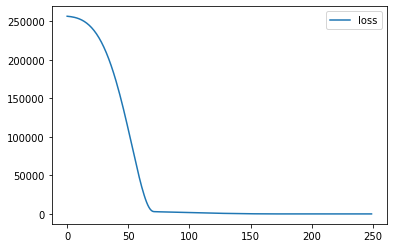

In [24]:
loss_df.plot()

In [25]:
model.evaluate(X_test,y_test,verbose=0)

25.477754592895508

In [26]:
model.evaluate(X_train,y_train,verbose=0)

23.80558967590332

In [27]:
test_predictions = model.predict(X_test)

10/10 [==============================] - 0s 2ms/step


In [28]:
#test_predictions

In [29]:
test_predictions = pd.Series(test_predictions.reshape(300,))

In [30]:
#test_predictions

In [31]:
pred_df = pd.DataFrame(y_test,columns=['Test True Y'])

In [32]:
pred_df = pd.concat([pred_df,test_predictions],axis=1)

In [33]:
#pred_df

In [34]:
pred_df.columns = ['Test True Y', 'Model Predictions']

In [35]:
#pred_df

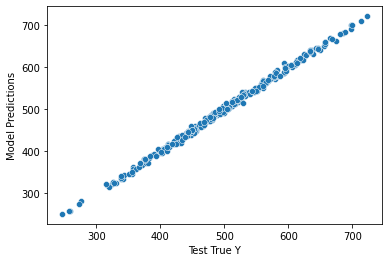

In [36]:
sns.scatterplot(x='Test True Y',y='Model Predictions',data=pred_df)

In [37]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [38]:
mean_absolute_error(pred_df['Test True Y'],pred_df['Model Predictions'])

4.064699252080979

In [39]:
#df.describe()

In [40]:
mean_squared_error(pred_df['Test True Y'],pred_df['Model Predictions'])**0.5

5.047551900306241

In [41]:
new_gem = [[998,1000]]

In [42]:
new_gem = scaler.transform(new_gem)

In [43]:
model.predict(new_gem)

1/1 [==============================] - 0s 18ms/step


array([[420.12372]], dtype=float32)

In [44]:
from tensorflow.keras.models import load_model

In [45]:
model.save('my_gem_model.h5')

In [46]:
later_model = load_model('my_gem_model.h5')

In [47]:
later_model.predict(new_gem)

1/1 [==============================] - 0s 65ms/step


array([[420.12372]], dtype=float32)